In [1]:
# cd D:\Dropbox\data\proj\PE_HYZ\IpythonRecord\2017_GBM_Final_Ready

In [1]:
cd D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE


In [2]:
#import SWAPLINEmain

import datetime
import seaborn as sns
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
#import backspinpy
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
#from numpy import in1d
%pylab inline
today=f"{datetime.datetime.now():%Y-%m-%d-%I:%M%p}"
today

Populating the interactive namespace from numpy and matplotlib


'2022-03-01-01:23PM'

In [3]:
dfpfc = pd.read_table("/Dropbox/data/proj/PE_HYZ/PublicDataSet/SL-AZ_DentateGyrusNeurogenesis/DG10xA.tab", index_col =0 ,header=0, sep="\t")
dfpfc.shape

<ipython-input-3-39e5d05ef2a8>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263

(14546, 5454)

In [4]:
dfpfc.head()

,10X46_1_GCCTACACGGGAGT-1,10X46_1_AAGCACTGATGGTC-1,10X43_1_GCGCATCTAGCTAC-1,10X46_1_TGGTAGTGAGAACA-1,10X46_1_GAGCTCCTGTGCAT-1,10X43_1_TAGGCATGGCCTTC-1,10X43_1_TAAGTAACGGACGA-1,10X43_1_GTTACTACTGTCCC-1,10X46_1_CAGATGACACCCTC-1,10X43_1_GGTTTACTCTTATC-1,...,10X46_1_TGTAGTCTCGCTAA-1,10X46_1_GATCGTGAGAGCTT-1,10X43_1_CAATCGGACCCTAC-1,10X46_1_CGGACTCTCTATTC-1,10X46_1_CTAAGGACATCAGC-1,10X43_1_CTAACTACTGACAC-1,10X46_1_ATCTGACTAATGCC-1,10X46_1_CCATATACTTGACG-1,10X43_1_ATGAAGGAATGCCA-1,10X46_1_GGACAGGATAGCGT-1
0610007P14Rik,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009B22Rik,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009L18Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009O20Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0610010F05Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dfpfc.tail()

,10X46_1_GCCTACACGGGAGT-1,10X46_1_AAGCACTGATGGTC-1,10X43_1_GCGCATCTAGCTAC-1,10X46_1_TGGTAGTGAGAACA-1,10X46_1_GAGCTCCTGTGCAT-1,10X43_1_TAGGCATGGCCTTC-1,10X43_1_TAAGTAACGGACGA-1,10X43_1_GTTACTACTGTCCC-1,10X46_1_CAGATGACACCCTC-1,10X43_1_GGTTTACTCTTATC-1,...,10X46_1_TGTAGTCTCGCTAA-1,10X46_1_GATCGTGAGAGCTT-1,10X43_1_CAATCGGACCCTAC-1,10X46_1_CGGACTCTCTATTC-1,10X46_1_CTAAGGACATCAGC-1,10X43_1_CTAACTACTGACAC-1,10X46_1_ATCTGACTAATGCC-1,10X46_1_CCATATACTTGACG-1,10X43_1_ATGAAGGAATGCCA-1,10X46_1_GGACAGGATAGCGT-1
mt-Nd2,5.0,0.0,1.0,2.0,7.0,4.0,0.0,1.0,6.0,6.0,...,4.0,2.0,1.0,1.0,4.0,3.0,0.0,0.0,2.0,1.0
mt-Nd4,8.0,5.0,4.0,2.0,5.0,1.0,3.0,3.0,10.0,21.0,...,2.0,0.0,2.0,0.0,2.0,4.0,3.0,4.0,4.0,1.0
mt-Nd5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mt-Nd6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Cluster,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,...,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius


In [6]:
dfpfcclus=dfpfc.iloc[-2:,:]
dfpfcclus.head()

,10X46_1_GCCTACACGGGAGT-1,10X46_1_AAGCACTGATGGTC-1,10X43_1_GCGCATCTAGCTAC-1,10X46_1_TGGTAGTGAGAACA-1,10X46_1_GAGCTCCTGTGCAT-1,10X43_1_TAGGCATGGCCTTC-1,10X43_1_TAAGTAACGGACGA-1,10X43_1_GTTACTACTGTCCC-1,10X46_1_CAGATGACACCCTC-1,10X43_1_GGTTTACTCTTATC-1,...,10X46_1_TGTAGTCTCGCTAA-1,10X46_1_GATCGTGAGAGCTT-1,10X43_1_CAATCGGACCCTAC-1,10X46_1_CGGACTCTCTATTC-1,10X46_1_CTAAGGACATCAGC-1,10X43_1_CTAACTACTGACAC-1,10X46_1_ATCTGACTAATGCC-1,10X46_1_CCATATACTTGACG-1,10X43_1_ATGAAGGAATGCCA-1,10X46_1_GGACAGGATAGCGT-1
mt-Nd6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Cluster,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,...,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius


In [7]:
dfpfcclus

,10X46_1_GCCTACACGGGAGT-1,10X46_1_AAGCACTGATGGTC-1,10X43_1_GCGCATCTAGCTAC-1,10X46_1_TGGTAGTGAGAACA-1,10X46_1_GAGCTCCTGTGCAT-1,10X43_1_TAGGCATGGCCTTC-1,10X43_1_TAAGTAACGGACGA-1,10X43_1_GTTACTACTGTCCC-1,10X46_1_CAGATGACACCCTC-1,10X43_1_GGTTTACTCTTATC-1,...,10X46_1_TGTAGTCTCGCTAA-1,10X46_1_GATCGTGAGAGCTT-1,10X43_1_CAATCGGACCCTAC-1,10X46_1_CGGACTCTCTATTC-1,10X46_1_CTAAGGACATCAGC-1,10X43_1_CTAACTACTGACAC-1,10X46_1_ATCTGACTAATGCC-1,10X46_1_CCATATACTTGACG-1,10X43_1_ATGAAGGAATGCCA-1,10X46_1_GGACAGGATAGCGT-1
mt-Nd6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Cluster,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,...,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius,Cajal-Retzius


In [8]:
dfpfc=dfpfc.iloc[:-1,:]
dfpfc.head()

,10X46_1_GCCTACACGGGAGT-1,10X46_1_AAGCACTGATGGTC-1,10X43_1_GCGCATCTAGCTAC-1,10X46_1_TGGTAGTGAGAACA-1,10X46_1_GAGCTCCTGTGCAT-1,10X43_1_TAGGCATGGCCTTC-1,10X43_1_TAAGTAACGGACGA-1,10X43_1_GTTACTACTGTCCC-1,10X46_1_CAGATGACACCCTC-1,10X43_1_GGTTTACTCTTATC-1,...,10X46_1_TGTAGTCTCGCTAA-1,10X46_1_GATCGTGAGAGCTT-1,10X43_1_CAATCGGACCCTAC-1,10X46_1_CGGACTCTCTATTC-1,10X46_1_CTAAGGACATCAGC-1,10X43_1_CTAACTACTGACAC-1,10X46_1_ATCTGACTAATGCC-1,10X46_1_CCATATACTTGACG-1,10X43_1_ATGAAGGAATGCCA-1,10X46_1_GGACAGGATAGCGT-1
0610007P14Rik,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009B22Rik,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009L18Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009O20Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0610010F05Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
cd .

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE


In [10]:
#sys.path.append("D:\\Dropbox\\data\\proj\\PE_HYZ\\BuidingCode\\SWAPLINE")

In [11]:
dfbk=dfpfc
dfpfc=dfbk
dfpfc.shape

(14545, 5454)

In [12]:
import prefiltering

In [13]:
path="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/"
dictfilename1="Homologene_mouse2human_dict2.pickle"
dfpfc=prefiltering.TransSpeciesGeneName(dfm=dfpfc, dictfilename=dictfilename1, path=path)
samegene=set(dfpfc.index)
len(samegene)

12515

In [14]:
path='D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/'
filename='PANTHER_cell_cycle_genes.txt'
#dfpfc2= prefilteringTest.prefilter(df_f=dfpfc,filename=filename, path=path)
dfpfc= prefiltering.prefilter(df_f=dfpfc,filename=filename, path=path)
dfpfc.shape

(8351, 5454)

In [15]:
commongene=list(dfpfc.index)
len(commongene)

8351

In [16]:
#import prefilteringTest0
#sw=SWprefiltering.SWAPLINE(dfpfc)
mu, cv, sigma, score, mu_linspace, cv_fit, params, mu_sorted, cv_sorted, thrs, MVlist=prefiltering.MVgenes(dfpfc)
#mu, cv, sigma, score, mu_linspace, cv_fit, params, mu_sorted, cv_sorted, thrs, MVlist=MVgenes(dfpfc)

p0: 0.02122700736718947 [0.02025873347672281  0.022195281257656126]
p1: -0.3033657166252723 [-0.3083659533885123  -0.29836547986203227]
p2: 0.6269369345661343 [0.6078337233143423  0.6460401458179263]


In [17]:
thrs

2210

In [18]:
cd .

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE


In [19]:
import SWvisPlot

In [20]:
df_dev = dfpfc.loc[MVlist]
df_dev.shape

(2210, 5454)

In [21]:
set(dfpfcclus.loc['Cluster'])

{'Astrocytes',
 'Cajal-Retzius',
 'Cck-Tox',
 'Endothelial',
 'GABA-Cnr1',
 'GABA-Lhx6',
 'Granule-immature',
 'Granule-mature',
 'Microglia',
 'Mossy-Adcyap1',
 'Mossy-Cyp26b1',
 'Mossy-Klk8',
 'NFOL',
 'Neuroblast 1',
 'Neuroblast 2',
 'OL',
 'OPC',
 'PVM',
 'Pericytes',
 'Radial Glia-like',
 'VLMC',
 'nIPC'}

In [22]:
proto = pd.Series({'Astrocytes':   'Astrocytes',
      'Cajal-Retzius': 'Cajal-Retzius',
       'Cck-Tox':  'Cck-Tox',
      'Endothelial': 'Endo',
       'GABA-Cnr1':  'GABA',
        'GABA-Lhx6': 'GABA',
       'Granule-immature':  'Granule',
       'Granule-mature':  'Granule',
      'Microglia':'Microglia',
       'Mossy-Adcyap1': 'Mossy',
       'Mossy-Cyp26b1' : 'Mossy',
       'Mossy-Klk8': 'Mossy',
       'Neuroblast 1':'Neuroblast',
       'Neuroblast 2':'Neuroblast',
       'NFOL': 'NFOL',
       'OPC':   'OPC',
       'OL':   'OLIG',
                    'OLIG': 'OLIG',
       'PVM':   'PVM',
       'Pericytes':'Peri/VLMC',
       'Radial Glia-like': 'nIPC/Rgl',
       'VLMC':  'Peri/VLMC',
       'nIPC':   'nIPC/Rgl'})

mct_dev = dfpfcclus.loc['Cluster'].values
mprotogruop = proto.loc[mct_dev].values
len(mprotogruop)

5454

In [23]:
dfpfcclus.loc['Cluster']=mprotogruop

In [24]:
set(dfpfcclus.loc['Cluster'])

{'Astrocytes',
 'Cajal-Retzius',
 'Cck-Tox',
 'Endo',
 'GABA',
 'Granule',
 'Microglia',
 'Mossy',
 'NFOL',
 'Neuroblast',
 'OLIG',
 'OPC',
 'PVM',
 'Peri/VLMC',
 'nIPC/Rgl'}

In [25]:
#import prefilteringTest12
#sw=SWprefiltering.SWAPLINE(dfpfc)
list_genes,df_fold=prefiltering.enrichmentscoreBETA(dfpfcclus=dfpfcclus,df_dev=df_dev, shortcut=True)

442
15


In [26]:
len(set(list_genes))

2109

In [27]:
mdf_train_set, mclasses_names, mtrain_index, sharedMVgenes =prefiltering.MVgene_Scaling(list_genes=list_genes,dfpfc=dfpfc,score=score,
                                                                   thrs=thrs, TPTT=0,     dfpfcclus=dfpfcclus,mprotogruop=mprotogruop,commongene=commongene,
                                                                                              sharedMVgenes=None,std_scaling=True,
    tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt", learninggroup="train")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:301: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)
D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:302: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.astype(float).dropna(0)
D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:304: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = scalepfc.dropna(0)
D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:305: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfpfc_dev = scalepfc.loc[set(scalepfc.index) & set(sharedMVgenes)].dropna()


In [28]:
mdf_train_set.shape

(2374, 5454)

# Skorch_NN

In [29]:
import torch
from torch import nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
torch.set_default_tensor_type('torch.DoubleTensor')
torch.manual_seed(0);
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [30]:
from skorch.callbacks import Callback
class Classifier3Layers(nn.Module):
    def __init__(
            self,
            input_dim=mdf_train_set.shape[0],
            hidden_dim=int(mdf_train_set.shape[0]/5),
            output_dim=len(unique(mtrain_index)),
            dropout=0.3,
    ):
        super(Classifier3Layers, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X
        
def NNclassifer(mdf_train_set=mdf_train_set,mtrain_index=mtrain_index,epochNum=100,learningRate=0.05,verbose=0,optimizerMmentum=0.8,
    dropout=0.3):
    #nist_d=mdf_train_set.shape[0],
    #hidden_d = int(mnist_d / 5),
    #output_d = len(unique(mtrain_index))):
    #from skorch import NeuralNetClassifier
    #import Classifier3Layers
    #import LossTweet
    net=NeuralNetClassifier(
        Classifier3Layers,
        max_epochs=epochNum,
        lr=learningRate,
        verbose=0,
        optimizer__momentum=optimizerMmentum,
        module__dropout=dropout,
        optimizer__nesterov = True,
    #callbacks=[acTweet(max_loss=0.2)]
    )

    normalizer = 0.9*mdf_train_set.values.max(1)[:,newaxis]
    net .fit((mdf_train_set.values / normalizer).T, mtrain_index)
    #noticeMSG
    return net



In [33]:
net=NNclassifer(
    mdf_train_set=mdf_train_set,
    mtrain_index=mtrain_index,
    epochNum=100,
    learningRate=0.05,
    verbose=0,
    optimizerMmentum=0.8,
    dropout=0.3,
    #imizer__nesterov=True,
    )

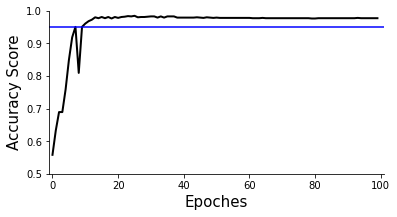

In [35]:
#import SWvisPlot9
ax=SWvisPlot.AccuracyPlot( acc=net.history[:,'valid_acc'] ,accCutoff=0.95,
                 Xlow=-1, Xhigh=len(net.history[:,'valid_acc'])+1,Ylow=0.5, Yhigh=1,
               )

## reset the score as 0.5

In [31]:
net=NNclassifer(
    mdf_train_set=mdf_train_set,
    mtrain_index=mtrain_index,
    epochNum=25,
    learningRate=0.05,
    verbose=0,
    optimizerMmentum=0.8,
    dropout=0.3,
 )

In [32]:
set(dfpfcclus.loc["Cluster"].values)

{'Astrocytes',
 'Cajal-Retzius',
 'Cck-Tox',
 'Endo',
 'GABA',
 'Granule',
 'Microglia',
 'Mossy',
 'NFOL',
 'Neuroblast',
 'OLIG',
 'OPC',
 'PVM',
 'Peri/VLMC',
 'nIPC/Rgl'}

In [33]:
mwanted_order =[
 'Mossy', 'Cajal-Retzius', 'Cck-Tox', 'GABA',  'Endo',           
 'Peri/VLMC', 'PVM', 'Microglia', 'Astrocytes', 'OLIG',
 'NFOL', 'OPC', 'nIPC/Rgl','Neuroblast','Granule'
]


In [34]:
refcolor_dict = pd.Series({'Astrocytes':   (190,  10,  10),'Cajal-Retzius': (225, 160,  30),'Cck-Tox':    (217, 215,   7),
             'Endo':    (170, 180, 170), 'GABA':   (130, 140, 140),'Granule':    (180, 140, 130),
             'Microglia':  (100, 100, 240),'Mossy': ( 80, 235, 255),'NFOL':(190, 235, 255),
              'Neuroblast':(210, 255, 215),'OLIG':(230, 140, 120), 'OPC':  (255, 195,  28),
              'PVM':  (139, 101, 100),'Pericytes':  (252, 183,  26),'Radial Glia-like':   (214, 194,  39),
              'VLMC':  (255, 120, 155),'nIPC': (250, 145,  45),'hRgl2a':  (250, 125,  25),
              'hDA0':    (190, 200, 190),'hOPC':   (255,  35, 155),'hRN':     (199, 121,  41),
              'hNbGaba': ( 40,  55, 130),'hGaba':  (  7,  121, 61),'hOMTN':   ( 95, 186,  70),
              'hSert':   ( 50, 180, 180),'nIPC/Rgl':   (245, 205, 170), 'Peri/VLMC':   (185, 245, 30),
              'eSCc':(205,205,220)})

In [35]:
mclasses_names[mtrain_index]

array(['Endo', 'Endo', 'Endo', ..., 'Cajal-Retzius', 'Cajal-Retzius',
       'Cajal-Retzius'], dtype=object)

In [36]:
import SWAPLINEmain

In [37]:

mreordername, dfprobRef,refcolor_dict,refdataLR, mreorder_idx =SWAPLINEmain.prediction(
    mwanted_order = mwanted_order, mclasses_names = mclasses_names, mprotogruop = dfpfcclus.loc["Cluster"].values,
     mtrain_index = mtrain_index, net = net, mreorder_ix = None, mdf_train_set = mdf_train_set,   
    learninggroup="train", mcolor_dict=refcolor_dict)
                                 

In [ ]:
#.RadarVisualization

In [56]:
todaytime=f"{datetime.datetime.now():%Y%m%d%I%M%p}"
dfprobRef.to_csv("probability_table%s.tab"%todaytime,sep="\t")
dfclRef.to_csv("Location_table%s.tab"%todaytime,sep="\t")


In [59]:
#import SWAPLINEmain9
dftest0,ratiodf=SWAPLINEmain.permutationTest(mdf_train_set=mdf_train_set,net=net, dfprobRef=dfprobRef,mreorder_ix=mreorder_idx,num=10)
#SWvisPlot.permutationPlot(dftest0)

## TCGA GBM CELL

In [240]:
dfgbm = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/TCGA_GBM/TCGA_GBM_AglientRPKMwithSubtype.tab", index_col =0 ,header=0, sep="\t")
dfgbm.shape

<ipython-input-240-10fa8658e1aa>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,118,119,120,121,122,123,125,126,127,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,2

(17815, 548)

In [241]:
dfgbm=dfgbm.T.loc[dfgbm.loc["Unnamed: 1"].isin(['Classical',
 'G-CIMP',
 'Mesenchymal',
 'Neural',
 'Proneural'])].T
dfgbm.shape

(17815, 539)

In [242]:
dfgbmclus=dfgbm.iloc[-2:,:]
dfgbmclus.head()

,TCGA-02-0001,TCGA-02-0003,TCGA-02-0004,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-76-4931,TCGA-76-4932,TCGA-76-4934,TCGA-76-4935,TCGA-76-6191,TCGA-76-6193,TCGA-76-6282,TCGA-76-6285,TCGA-81-5910,TCGA-87-5896
SELS,-0.0121818181818,-0.0350909090909,0.695272727273,0.535909090909,0.673727272727,0.11454545454500001,-0.520909090909,0.285181818182,-0.42545454545500005,0.544636363636,...,0.520272727273,0.338181818182,0.572909090909,-0.364,-0.0026363636363600004,0.314727272727,0.131545454545,0.037909090909099996,0.320454545455,0.5660000000000001
Unnamed: 1,Classical,Proneural,Mesenchymal,Mesenchymal,Proneural,Classical,G-CIMP,Proneural,G-CIMP,Classical,...,Classical,Proneural,Proneural,Proneural,Proneural,Mesenchymal,Mesenchymal,Proneural,Classical,Classical


In [243]:
dfgbmclus.index=["SELS","Cluster"]
dfgbmclus.head()

,TCGA-02-0001,TCGA-02-0003,TCGA-02-0004,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-76-4931,TCGA-76-4932,TCGA-76-4934,TCGA-76-4935,TCGA-76-6191,TCGA-76-6193,TCGA-76-6282,TCGA-76-6285,TCGA-81-5910,TCGA-87-5896
SELS,-0.0121818181818,-0.0350909090909,0.695272727273,0.535909090909,0.673727272727,0.11454545454500001,-0.520909090909,0.285181818182,-0.42545454545500005,0.544636363636,...,0.520272727273,0.338181818182,0.572909090909,-0.364,-0.0026363636363600004,0.314727272727,0.131545454545,0.037909090909099996,0.320454545455,0.5660000000000001
Cluster,Classical,Proneural,Mesenchymal,Mesenchymal,Proneural,Classical,G-CIMP,Proneural,G-CIMP,Classical,...,Classical,Proneural,Proneural,Proneural,Proneural,Mesenchymal,Mesenchymal,Proneural,Classical,Classical


In [244]:
cd /Dropbox/data/proj/PE_HYZ/PublicDataSet/TCGA_GBM/20190228TCGA_GBM_autoencoder

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\TCGA_GBM\20190228TCGA_GBM_autoencoder


In [245]:
dfoutput=pd.read_table("20190327_Allgenes_BulkTissue_30Epcho_PowLaw_noMaxMin_LogStd_CONV1D_output_CNNnoMaxpool_fitPEgbm.tab",index_col=0,header=0,sep="\t")

In [246]:
dfoutput.shape

(13797, 166)

In [247]:
dfnew=dfoutput.T.join(dfgbmclus.loc["Cluster"].T,how="inner").T
dfnew.shape

(13798, 161)

In [248]:
dfnew.tail()

,TCGA-02-0047,TCGA-02-0055,TCGA-02-2483,TCGA-02-2485,TCGA-02-2486,TCGA-06-0125,TCGA-06-0129,TCGA-06-0130,TCGA-06-0132,TCGA-06-0138,...,TCGA-41-3915,TCGA-41-4097,TCGA-41-5651,TCGA-76-4925,TCGA-76-4926,TCGA-76-4927,TCGA-76-4928,TCGA-76-4929,TCGA-76-4931,TCGA-76-4932
PRSS1,0.501261,0.567065,0.501372,0.501,0.505629,0.551123,0.501067,0.501493,0.501195,0.500882,...,0.500969,0.500962,0.502167,0.501432,0.501366,0.50117,0.501351,0.501401,0.501302,0.501249
NAT14,0.499668,0.498635,0.51421,0.544457,0.51914,0.516667,0.499439,0.5003,0.498359,0.510435,...,0.512851,0.509306,0.497673,0.49952,0.517644,0.506994,0.509832,0.500314,0.524802,0.548376
CALML4,0.502136,0.52209,0.514227,0.526481,0.563836,0.504787,0.536814,0.654185,0.529376,0.510455,...,0.517501,0.517935,0.500859,0.510076,0.502356,0.504015,0.504512,0.582425,0.510274,0.499822
DPH5,0.508501,0.511129,0.53748,0.51411,0.513353,0.509413,0.512402,0.508023,0.511028,0.546658,...,0.510575,0.507925,0.520652,0.514696,0.513796,0.513182,0.512772,0.519249,0.512725,0.535709
Cluster,Proneural,Mesenchymal,G-CIMP,Classical,Mesenchymal,Classical,G-CIMP,Mesenchymal,Neural,Neural,...,Mesenchymal,Mesenchymal,Proneural,Proneural,Classical,Neural,Classical,Neural,Classical,Proneural


In [249]:
dfclus=dfnew.iloc[-1:,:]
dfgbm=dfnew.iloc[:-1,:].astype(float)

In [260]:
dfclus.head()

,TCGA-02-0047,TCGA-02-0055,TCGA-02-2483,TCGA-02-2485,TCGA-02-2486,TCGA-06-0125,TCGA-06-0129,TCGA-06-0130,TCGA-06-0132,TCGA-06-0138,...,TCGA-41-3915,TCGA-41-4097,TCGA-41-5651,TCGA-76-4925,TCGA-76-4926,TCGA-76-4927,TCGA-76-4928,TCGA-76-4929,TCGA-76-4931,TCGA-76-4932
Cluster,Proneural,Mesenchymal,G-CIMP,Classical,Mesenchymal,Classical,G-CIMP,Mesenchymal,Neural,Neural,...,Mesenchymal,Mesenchymal,Proneural,Proneural,Classical,Neural,Classical,Neural,Classical,Proneural


In [251]:
dfgbm.head()

,TCGA-02-0047,TCGA-02-0055,TCGA-02-2483,TCGA-02-2485,TCGA-02-2486,TCGA-06-0125,TCGA-06-0129,TCGA-06-0130,TCGA-06-0132,TCGA-06-0138,...,TCGA-41-3915,TCGA-41-4097,TCGA-41-5651,TCGA-76-4925,TCGA-76-4926,TCGA-76-4927,TCGA-76-4928,TCGA-76-4929,TCGA-76-4931,TCGA-76-4932
NUDT14,0.504726,0.525137,0.528924,0.509180,0.561378,0.505807,0.505432,0.516464,0.578135,0.514643,...,0.508649,0.513610,0.501947,0.508216,0.505228,0.528699,0.516000,0.503547,0.526008,0.505132
ZNHIT3,0.500812,0.500055,0.518533,0.503156,0.524947,0.500195,0.500607,0.500089,0.503923,0.534820,...,0.508641,0.500401,0.501760,0.508964,0.503530,0.502174,0.505064,0.503670,0.501258,0.501854
SMU1,0.517179,0.522226,0.504352,0.560984,0.563093,0.521253,0.525444,0.527362,0.498511,0.522057,...,0.548257,0.497453,0.533655,0.578977,0.542514,0.514035,0.496998,0.497768,0.534839,0.528114
NUDT5,0.527412,0.543240,0.604145,0.504543,0.514864,0.522596,0.541485,0.519350,0.512597,0.515239,...,0.513210,0.503838,0.527671,0.504932,0.504870,0.510188,0.507680,0.504726,0.505028,0.504837
EHD4,0.544148,0.565796,0.512481,0.501842,0.553653,0.517795,0.501566,0.575549,0.534867,0.513551,...,0.527331,0.531795,0.502868,0.505293,0.499515,0.546560,0.639735,0.505231,0.510454,0.535139


In [252]:
dfgbm.shape

(13797, 161)

In [253]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm, dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=False,TPTT=100000,
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:324: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.astype(float).dropna(0)


In [261]:
df_train_setclpn.shape

(2374, 161)

In [255]:
protogruop

array(['Proneural', 'Mesenchymal', 'G-CIMP', 'Classical', 'Mesenchymal',
       'Classical', 'G-CIMP', 'Mesenchymal', 'Neural', 'Neural',
       'Mesenchymal', 'Mesenchymal', 'Mesenchymal', 'Proneural',
       'Classical', 'Classical', 'Mesenchymal', 'Neural', 'Proneural',
       'Neural', 'Mesenchymal', 'Classical', 'Mesenchymal', 'Mesenchymal',
       'Classical', 'Neural', 'Neural', 'Proneural', 'Mesenchymal',
       'Mesenchymal', 'Proneural', 'Neural', 'Neural', 'Neural', 'Neural',
       'Neural', 'Proneural', 'Classical', 'Classical', 'Proneural',
       'Classical', 'Neural', 'Mesenchymal', 'Mesenchymal', 'Neural',
       'Classical', 'Mesenchymal', 'Proneural', 'Proneural',
       'Mesenchymal', 'Mesenchymal', 'Classical', 'Classical',
       'Classical', 'Neural', 'Mesenchymal', 'G-CIMP', 'Classical',
       'Mesenchymal', 'Neural', 'Mesenchymal', 'Neural', 'Classical',
       'Proneural', 'G-CIMP', 'Mesenchymal', 'Classical', 'Neural',
       'Neural', 'Proneural', 'Proneura

In [263]:
wanted_orderclpn =['Classical', 'Mesenchymal', 'Neural', 'Proneural', 'G-CIMP']
#bool00clpn=array([True]*len(df_train_setclpn.columns))
color_dictclpn = pd.Series({'Classical':  (100, 100, 240),'Mesenchymal':   ( 95, 186,  70),
              'Neural':  (255, 120, 155), 'Proneural': ( 80, 235, 255), 'G-CIMP':  (250, 125,  25),
              'Stem cells':    (190, 200, 190)})

In [264]:
#import SWAPLINEmain10
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization

## PE_GBM CELL

In [61]:
dfgbm = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/GBMprim_UMI_WithCluster_New.tab", index_col =0 ,header=0, sep="\t")
dfgbm.shape

<ipython-input-61-dfe870e7b549>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

(20129, 4073)

In [62]:
dfgbm.head()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOC2L,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
dfgbm.tail()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
CDY1-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPRY3-loc2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
VAMP7-loc1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,1,0,0
IL9R-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cluster,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,...,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09


In [64]:
dfgbm=dfgbm.T.loc[dfgbm.loc["Cluster"]!='CD45+']
dfgbm.shape

(4044, 20129)

In [65]:
dfgbm=dfgbm.T
set(dfgbm.loc["Cluster"])

{'CL1_KI09',
 'CL2_KI12',
 'CL3_KI07',
 'CL4_KI12',
 'CL5_KI01',
 'CL6_KI03.07',
 'CL7_KI06',
 'CL8_KI16',
 'MS1_KI24',
 'MS2_KI09',
 'MS3',
 'MS4_KI09',
 'MS5',
 'MS6_KI17.05',
 'MS7_KI09',
 'MS8_KI16',
 'NL1_KI15.12',
 'PN1_KI15.12.08.01',
 'PN2_KI15'}

In [66]:
dfclus=dfgbm.iloc[-1:,:]
dfgbm=dfgbm.iloc[:-1,:]

In [67]:
dfclus.head()

,KI009-1772-122-307-C01,KI009-1772-122-307-E01,KI009-1772-122-307-F01,KI009-1772-122-307-C02,KI009-1772-122-307-F02,KI009-1772-122-307-B03,KI009-1772-122-307-C03,KI009-1772-122-307-G04,KI009-1772-122-307-C06,KI009-1772-122-307-C07,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
Cluster,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,...,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09


In [80]:
dfgbm.head()

,KI009-1772-122-307-C01,KI009-1772-122-307-E01,KI009-1772-122-307-F01,KI009-1772-122-307-C02,KI009-1772-122-307-F02,KI009-1772-122-307-B03,KI009-1772-122-307-C03,KI009-1772-122-307-G04,KI009-1772-122-307-C06,KI009-1772-122-307-C07,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOC2L,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm.astype(float),dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=True,TPTT=dfpfc.mean(1),
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:322: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


In [110]:
df_train_setclpn.shape

(2374, 4044)

In [111]:
protogruop

array(['CL1_KI09', 'CL1_KI09', 'CL1_KI09', ..., 'MS7_KI09', 'MS7_KI09',
       'MS7_KI09'], dtype=object)

In [112]:
wanted_orderclpn =['CL1_KI09',
 'CL2_KI12',
 'CL3_KI07',
 'CL4_KI12',
 'CL5_KI01',
 'CL6_KI03.07',
 'CL7_KI06',
 'CL8_KI16',
 'MS1_KI24',
 'MS2_KI09',
 'MS3',
 'MS4_KI09',
 'MS5',
 'MS6_KI17.05',
 'MS7_KI09',
 'MS8_KI16',
 'NL1_KI15.12',
 'PN1_KI15.12.08.01',
 'PN2_KI15']
color_dictclpn=pd.Series({'CL1_KI09':  ( 10, 10, 250),'CL2_KI12': (215, 105,  30),'CL3_KI07':   (117, 245, 7) ,
              'PN1_KI15.12.08.01':    (111,111,111),'CL5_KI01': (79,47,79)  ,'PN2_KI15':    (180, 140, 130),
              'CL4_KI12':  (100, 180, 240),'MS8_KI16': ( 80, 235, 255),'CL6_KI03.07':(139,69,19),
              'CL7_KI06':(10, 120, 190),'CL8_KI16':(230, 10, 100),'NL1_KI15.12':  (120, 15,215),
            'MS1_KI24':   (190,  10,  10),'MS2_KI09': (225, 160,  30),'MS3':   (217, 245,   7) ,
            'MS4_KI09': (69,155,110)  ,'MS5':  (100, 100, 240),'MS6_KI17.05':  (190, 200, 190),'MS7_KI09':   ( 50, 180, 180),
                     })

In [114]:
#import SWAPLINEmain10
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization

# Suva2019_GBM

In [134]:
dfsample = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/2019Suva/IDHwtGBM.processed.SS2.logTPM.txt/IDHwtGBM.processed.SS2.logTPM.txt", index_col =0 ,header=0, sep="\t")
dfsample.shape


(23686, 7930)

In [135]:
dfsampleclus = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/2019Suva/IDHwtGBM.Metadata.SS2.txt", index_col =0 ,header=0, sep="\t")
dfsampleclus.shape


(7931, 13)

In [136]:
dfsampleclus.head()

,Sample,GBM_Type,Cell_Type,Cross_Section,Genes_Expressed,AC-like,MES1-like,MES2-like,NPC1-like,NPC2-like,OPC-like,G1S,G2M
NAME,,,,,,,,,,,,,
TYPE,group,group,group,group,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
MGH100-P5-A01,MGH100,Adult,Malignant,NaN,7403,2.29724756105443,0.311211961707847,-0.293633485956514,-0.516822723797423,-0.801937232473608,0.417244989115182,-0.951816425952768,-0.310899447575504
MGH100-P5-A03,MGH100,Adult,Malignant,NaN,8861,-0.559428510000344,-1.20298531371585,-0.579529857513807,0.893472111534824,-0.149805199002272,0.896569778332911,3.62443186028081,1.47087171714853
MGH100-P5-A04,MGH100,Adult,Malignant,NaN,5957,-1.08740329652001,-0.0734224534184421,2.25051898663126,-1.65942656638598,-0.860216154455462,-1.42107814485363,-0.346711265261959,-0.303424805657141
MGH100-P5-A06,MGH100,Adult,Malignant,NaN,7320,-0.646200158140011,-0.541540113216199,-0.482611877864668,0.564371473329837,-0.043081960262292,0.53108354241134,3.02202290807356,0.821238632091698


In [137]:
set(dfsampleclus["Cell_Type"])

{'Macrophage', 'Malignant', 'Oligodendrocyte', 'T-cell', 'group'}

In [138]:
dfsampleclus=dfsampleclus.loc[dfsampleclus["Cell_Type"].isin(['Malignant'])]
dfsampleclus.shape

(6863, 13)

In [139]:
dfsample=dfsample[dfsampleclus.index].dropna()
dfsample.shape

(23686, 6863)

In [140]:
dfsample.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,1.409798,0.436162,0.00000,0.0,0.000000,0.508936,0.889084,2.948414,1.025029,1.393416,...,0.0000,0.0,0.0000,1.6955,0.0,0.000000,0.00000,2.0841,0.0000,0.0000
A1BG-AS1,0.000000,2.499272,3.74771,0.0,3.229742,1.969749,0.000000,0.000000,2.650535,0.000000,...,0.0000,0.0,0.0000,0.0000,0.0,3.283000,0.00000,0.0000,0.0000,3.6513
A1CF,0.000000,0.000000,0.00000,0.0,0.000000,0.108357,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0000,0.0000,0.0,0.071763,0.00000,0.0000,0.0000,0.0000
A2M,2.850199,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.468844,0.000000,...,2.7793,0.0,4.0601,1.4082,0.0,7.084700,5.51510,5.0966,2.2975,5.5945
A2M-AS1,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0000,0.0000,0.0,0.552870,0.49978,0.0000,0.0000,0.0000


In [141]:
Patientlist=[]
for item in dfsample.columns:
    temp=item.split("-")[0]
    if temp[:3]=="MGH":
        temp=temp[:6]
    Patientlist.append(temp)
len(Patientlist)

6863

In [142]:
set(Patientlist)

{'BT1160',
 'BT1187',
 'BT749',
 'BT771',
 'BT786',
 'BT830',
 'BT920',
 'MGH100',
 'MGH101',
 'MGH102',
 'MGH104',
 'MGH105',
 'MGH106',
 'MGH110',
 'MGH113',
 'MGH115',
 'MGH121',
 'MGH122',
 'MGH124',
 'MGH125',
 'MGH128',
 'MGH129',
 'MGH136',
 'MGH143',
 'MGH151',
 'MGH152',
 'MGH66',
 'MGH85'}

In [143]:
dfsample.loc["PaitentID"]=Patientlist

In [144]:
dfsampleclus=dfsample.iloc[-2:,:]
dfsampleclus.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
ZZZ3,0.0,0.0,0.0,0.0,2.908621,2.428946,0.0,0.0,3.181262,0.0,...,4.8348,0.0,0.0,0.0,0.0,2.5852,0.0,0.0,0.0,0.0
PaitentID,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,...,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920


In [145]:
dfsample=dfsample.iloc[:-1,:]
dfsample.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,1.409798,0.436162,0.0,0.0,0.0,0.508936,0.889084,2.948414,1.025029,1.393416,...,0.0,0.0,0.0,1.6955,0.0,0.0,0.0,2.0841,0.0,0.0
A1BG-AS1,0.0,2.499272,3.74771,0.0,3.229742,1.969749,0.0,0.0,2.650535,0.0,...,0.0,0.0,0.0,0.0,0.0,3.283,0.0,0.0,0.0,3.6513
A1CF,0.0,0.0,0.0,0.0,0.0,0.108357,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.071763,0.0,0.0,0.0,0.0
A2M,2.850199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.468844,0.0,...,2.7793,0.0,4.0601,1.4082,0.0,7.0847,5.5151,5.0966,2.2975,5.5945
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.55287,0.49978,0.0,0.0,0.0


In [147]:
#Filtering Mgl-like
dfgbm.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A07,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-B02,MGH100-P5-B09,MGH100-P5-C04,MGH100-P5-C06,...,BT920-P4-G07,BT920-P4-G08,BT920-P4-G09,BT920-P4-G10,BT920-P4-H02,BT920-P4-H03,BT920-P4-H05,BT920-P4-H08,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,1.409798,0.436162,0.00000,0.000000,0.889084,2.948414,1.393416,0.0,0.335712,0.000000,...,0.0000,0.0000,1.5084,0.85758,0.0,0.0000,0.0,0.000000,0.0000,0.0000
A1BG-AS1,0.000000,2.499272,3.74771,3.229742,0.000000,0.000000,0.000000,0.0,1.211635,2.398077,...,0.0000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,3.283000,0.0000,3.6513
A1CF,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.071763,0.0000,0.0000
A2M,2.850199,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.079335,...,3.1778,2.8065,4.3127,3.17220,0.0,4.0601,0.0,7.084700,2.2975,5.5945
A2M-AS1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.552870,0.0000,0.0000


In [148]:
dfclus=dfsampleclus
dfclus.index=["Unknown","Cluster"]
dfclus

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
Unknown,0.0,0.0,0.0,0.0,2.908621,2.428946,0.0,0.0,3.181262,0.0,...,4.8348,0.0,0.0,0.0,0.0,2.5852,0.0,0.0,0.0,0.0
Cluster,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,...,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920


In [149]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm.astype(float),dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=True,TPTT=dfpfc.mean(1),
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:322: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


In [150]:
wanted_orderclpn =['BT1160',
 'BT1187',
 'BT749',
 'BT771',
 'BT786',
 'BT830',
 'BT920',
 'MGH100',
 'MGH101',
 'MGH102',
 'MGH104',
 'MGH105',
 'MGH106',
 'MGH110',
 'MGH113',
 'MGH115',
 'MGH121',
 'MGH122',
 'MGH124',
 'MGH125',
 'MGH128',
 'MGH129',
 'MGH136',
 'MGH143',
 'MGH151',
 'MGH152',
 'MGH66',
 'MGH85']

color_dictclpn = pd.Series({'BT1160':  ( 50, 180, 180),'BT1187': (225, 160,  30),'BT749':    (217, 245,   7),
             'BT771':    (70, 80, 10), 'BT786':   (130, 140, 140),'BT830':    (80, 140, 130),
             'BT920':  (100, 100, 240),'MGH100': ( 80, 35, 255),'MGH101':(190, 235, 255),
              'MGH102':(210, 255, 215),'MGH104':(230, 140, 120),'MGH105':  (190,  10,  10),
                           
                           'MGH106':  ( 50, 80, 180), 'MGH110': (25, 160,  30),'MGH113':    (27, 245,   7),
            'MGH115':    (170, 80, 10), 'MGH121':   (130, 140, 140), 'MGH122':    (80, 140, 30),
              'MGH124':  (100, 10, 240),'MGH125': ( 180, 35, 255),'MGH128':(190, 235, 55),
              'MGH129':(210, 55, 215),'MGH136':(20, 140, 120),'MGH143':  (190,  210,  10),
                    'MGH151':  ( 30, 80, 80), 'MGH152': (25, 60,  30),'MGH66':    (27, 245,  207),
            'MGH85':    (70, 80, 210),      
                           
                           })

In [151]:
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization

## Couturier2020_DevGBM

In [121]:
import loompy

In [122]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_Couturier2020_DevGBM

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_Couturier2020_DevGBM


In [124]:
ds=loompy.connect("20210809FinalMatrixWithCluster.loom")

In [126]:
dfgbm=pd.DataFrame(ds[:,:])

In [127]:
dfgbm.index=ds.ra["Gene"]
dfgbm.columns=ds.ca['CellID']
dfgbm.loc["PatientID"]=ds.ca['PatientID']
dfgbm.loc["Cluster"]=ds.ca['Cluster']

In [128]:
dfclus=dfgbm.iloc[-2:,:]
dfgbm=dfgbm.iloc[:-2,:].astype(float)

In [129]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm.astype(float),dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=True,TPTT=dfpfc.mean(1),
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

In [133]:
wanted_orderclpn =['Astro', 'Mesenchymal', 'Neuronal', 'Oligo', 'Progenitor', 'Unassigned']
#bool00clpn=array([True]*len(df_train_setclpn.columns))
#reorder_ixclpn = [list(classes_namesclpn).index(i) for i in wanted_orderclpn]
color_dictclpn = pd.Series({'Astro':  (100, 100, 240), 'Neuronal':   ( 0, 86,  255),
              'Mesenchymal':  (55, 120, 55), 'Oligo': ( 255,185, 5), 'Unassigned':  (192,192,192),
             'Progenitor':    (190, 0, 0)})

In [130]:
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
RadarVisualization#

In [1110]:
wanted_orderclpn =['BT333',
 'BT338',
 'BT346',
 'BT363',
 'BT364',
 'BT368',
 'BT389',
 'BT390',
 'BT397',
 'BT400',
 'BT402',
 'BT409']

color_dictclpn = pd.Series({'Astro':  (100, 100, 240), 'BT389':   ( 0, 86,  255),
              'Mesenchymal':  (55, 120, 55), 'Oligo': ( 255,185, 5), 'Unassigned':  (192,192,192),
            'BT333':    (190, 0, 0),'GBM11_batch':  (10, 10, 240), 'BT363':   ( 195, 86,  70),  'BT409':   ( 255, 0,  7),
            'BT338':  (55, 20, 155),  'BT346': ( 30, 235, 55),  'BT364':  (50, 125,  225),
                            'BT368':  (155, 111, 67),  'BT402': ( 188, 235, 25),  'BT400':  (200, 177,  33),   'BT397':  (105, 111, 217), 
              'BT390':    (190, 200, 190)})
#color_dictclpn = color_dictclpn.map(lambda x: list(map(lambda y: y/255., x)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [1117]:
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization#

array([[3.31063543e-06, 3.26011080e-04, 2.41925957e-04, ...,
        4.11926264e-01, 5.59385798e-01, 9.11410974e-11],
       [1.31956952e-06, 3.98126043e-04, 1.86791552e-03, ...,
        1.12708610e-03, 9.82625634e-01, 7.36181725e-14],
       [7.15080063e-07, 1.26919567e-05, 5.09370759e-03, ...,
        4.88226611e-01, 4.01354565e-04, 1.06169771e-13],
       ...,
       [8.09626719e-04, 1.46454915e-03, 1.40923772e-02, ...,
        5.17740996e-02, 7.80671896e-04, 1.92662418e-05],
       [3.89712682e-08, 5.12539808e-06, 5.80163878e-05, ...,
        9.26784888e-01, 8.71034853e-06, 1.31064219e-17],
       [2.64956428e-08, 7.86103797e-07, 4.31927457e-04, ...,
        4.78464076e-01, 2.54758416e-09, 6.13058739e-21]])